**Задача 2.** *Моделирование и обработка выборки из дискретного закона распределения.*


Задание:
1. Для данного n смоделируйте выборку из биномиального закона распределения: $P(ξ=j)=p_j=C_k^j\cdot p^j\cdot (1-p)^{(k-j)},j=\overline{0,k}.$
2. Для полученной выборки постройте статистический ряд. Найдите эмпирическую функцию распределения $\hat{F_n}(x)$. Постройте на одном рисунке графики $F(x)$ и $\hat{F_n}(x)$. Вычислите статистику Колмогорова.
3. Вычислите выборочное среднее и выборочную дисперсию и сравните с истинными значениями этих характеристик.

In [1]:
print('Вариант 8')
k = 15
print('Количество испытаний k: ', k)
p = 0.8
print('Вероятность успеха в одном испытании p: ', p)
n = 180
print('Объем выборки n: ', n)

Вариант 8
Количество испытаний k:  15
Вероятность успеха в одном испытании p:  0.8
Объем выборки n:  180


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import factorial

Сгенерирую биномиальный закон распределения для k = 15

In [3]:
def binomial(k, j, p):
    return (factorial(k) / (factorial(j) * factorial(k - j))) * (p ** j) * ((1 - p) ** (k - j))

probabilities = np.zeros((k + 1,), dtype=np.float64)
for i in range(k + 1):
    probabilities[i] = round(binomial(k, i, p), 3)
print('Теоретические вероятности биномиального закона:\n', probabilities)

Теоретические вероятности биномиального закона:
 [0.    0.    0.    0.    0.    0.    0.001 0.003 0.014 0.043 0.103 0.188
 0.25  0.231 0.132 0.035]


Смоделирую массив из данного закона распределения

In [4]:
u = np.zeros((k + 1,))
u[0] = probabilities[0]
for i in range(0, k + 1):
    u[i] = round(u[i - 1] + probabilities[i], 3)
print('Массив данного закона распределения:\n', u)

Массив данного закона распределения:
 [0.    0.    0.    0.    0.    0.    0.001 0.004 0.018 0.061 0.164 0.352
 0.602 0.833 0.965 1.   ]


Сгенерирую выборку случайных чисел из $[0, 1]$

In [5]:
"""
values = np.zeros((n,))
for i in range(n):
    values[i] = np.random.rand()
#pd.DataFrame(values).to_csv('task2_ver2.csv', header=None, sep=' ', columns=[0])
rand_numbers = values
"""
rand_numbers = np.array(pd.read_csv('task2_ver2.csv', header=None, sep=' ')[1], dtype=np.longdouble)
rand_numbers

array([0.92277529, 0.05786116, 0.48644255, 0.51006758, 0.87367905,
       0.27278283, 0.016568  , 0.73207008, 0.89636353, 0.043636  ,
       0.28070658, 0.73453979, 0.3987914 , 0.18018292, 0.61149231,
       0.89361767, 0.05602126, 0.34476637, 0.15523371, 0.6173784 ,
       0.22854472, 0.78332886, 0.60696615, 0.48671465, 0.58434853,
       0.55701216, 0.87634697, 0.81312402, 0.06511386, 0.12614906,
       0.77713752, 0.8097023 , 0.5831222 , 0.29504232, 0.25698545,
       0.7948969 , 0.36510865, 0.07587161, 0.50318476, 0.26239069,
       0.59638297, 0.75364113, 0.10132986, 0.12518888, 0.70927365,
       0.9582507 , 0.23738004, 0.1085961 , 0.08415168, 0.29072715,
       0.88075164, 0.62129583, 0.56658485, 0.30052814, 0.55215309,
       0.80692641, 0.64041468, 0.15165258, 0.83075157, 0.81522982,
       0.87063152, 0.29231683, 0.15001605, 0.91303443, 0.04729667,
       0.11652997, 0.28065436, 0.9229492 , 0.92547974, 0.72657362,
       0.0226724 , 0.8767784 , 0.10867439, 0.59031861, 0.02269

In [7]:
X = np.zeros((n,))

for i in range(n):
    for j in range(n):
        if rand_numbers[i] < u[j]:
            X[i] = j
            break
print('Смоделированный массив из данного закона распределения:\n', X)
#pd.DataFrame(X).to_csv('task4.csv', header=None, sep=' ', columns=[0])

Смоделированный массив из данного закона распределения:
 [14.  9. 12. 12. 14. 11.  8. 13. 14.  9. 11. 13. 12. 11. 13. 14.  9. 11.
 10. 13. 11. 13. 13. 12. 12. 12. 14. 13. 10. 10. 13. 13. 12. 11. 11. 13.
 12. 10. 12. 11. 12. 13. 10. 10. 13. 14. 11. 10. 10. 11. 14. 13. 12. 11.
 12. 13. 13. 10. 13. 13. 14. 11. 10. 14.  9. 10. 11. 14. 14. 13.  9. 14.
 10. 12.  9. 12. 10. 14. 11. 13. 10. 14. 11.  9. 12. 13. 11. 12. 12. 12.
 13. 13. 10. 12. 12. 13. 13. 14. 11. 14. 11. 13. 11. 14. 12. 14. 13. 12.
 13. 11. 11. 13. 12. 14. 13. 11.  9. 15. 10. 12. 15. 13. 13. 11. 13. 12.
 10. 13. 12. 13. 13. 12.  8.  9. 14. 14. 14. 10. 12. 10. 13. 12. 11. 12.
 11. 10. 12. 10. 11. 12. 12. 14. 12. 14. 14. 11. 13. 14. 11.  8. 10. 11.
 12. 13. 12. 14. 14. 12. 11.  9. 11. 11.  9. 13. 12. 11. 13.  8. 15. 11.]


In [19]:
val = np.zeros((k + 1,))
for i in range(n):
    for j in range(k + 1):
        if rand_numbers[i] < u[j]:
            val[j] += 1
            break
cum = np.zeros((k + 1,))
cum[0] = val[0]
for i in range(1, k + 1):
    cum[i] = cum[i - 1] + val[i]
cum /= n
cum = np.array([round(cum[i], 3) for i in range(len(cum))])
print('Кумулятивный массив:\n', cum)
xlist = np.array([i for i in range(0, k+1)])

Кумулятивный массив:
 [0.    0.    0.    0.    0.    0.    0.    0.    0.022 0.083 0.206 0.394
 0.606 0.828 0.983 1.   ]


Таблица вероятностей, эмпирических частот и относительных частот (полная таблица на печать не поместилась, поэтому разделил)

In [20]:
rel_freq = np.array([round(val[i] / n, 3) for i in range(k + 1)])
table = pd.DataFrame([xlist, probabilities, val, rel_freq], 
                     index=['значения', 'вероятности', 'эмпирические частоты', 'относительные частоты'])
table[[0, 1, 2, 3, 4, 5, 6, 7, 8]]

,0,1,2,3,4,5,6,7,8
значения,0.0,1.0,2.0,3.0,4.0,5.0,6.000,7.000,8.000
вероятности,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.003,0.014
эмпирические частоты,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,4.000
относительные частоты,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.022


In [21]:
table[[9, 10, 11, 12, 13, 14, 15]]

,9,10,11,12,13,14,15
значения,9.000,10.000,11.000,12.000,13.000,14.000,15.000
вероятности,0.043,0.103,0.188,0.250,0.231,0.132,0.035
эмпирические частоты,11.000,22.000,34.000,38.000,40.000,28.000,3.000
относительные частоты,0.061,0.122,0.189,0.211,0.222,0.156,0.017


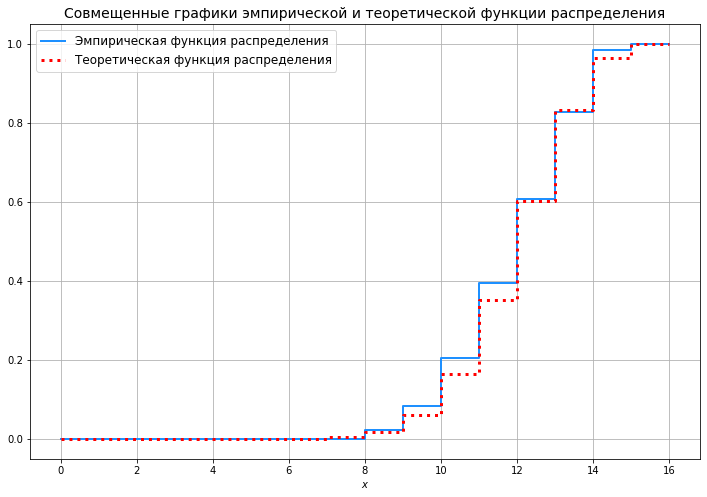

In [22]:
xlist = np.append(xlist, k+1)
cum = np.insert(cum, 0, 0)
u = np.insert(u, 0, 0)

plt.figure(figsize=(12, 8))
plt.step(xlist, cum, linestyle='solid', linewidth=2, color='dodgerblue', label='Эмпирическая функция распределения')
plt.step(xlist, u, linestyle=':', linewidth=3, color='red', label='Теоретическая функция распределения')
plt.xlabel('$x$')
plt.title('Совмещенные графики эмпирической и теоретической функции распределения', fontdict={'fontsize':14})
plt.legend(fontsize=12)
plt.grid()
plt.show()

В 6 на самом деле есть скачок в 0.001, но масштаб не позволяет отобразить это в лучшем виде. Поэтому ниже нарисовал часть графика, позволяющего рассмотреть этот самый скачок

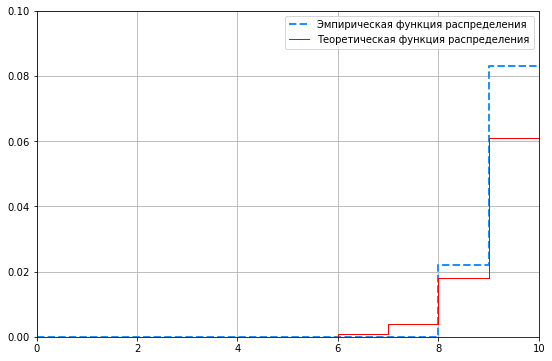

In [23]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(1, 1, 1)
ax.step(xlist[0:11], cum[0:11], linestyle='--', linewidth=2, color='dodgerblue', label='Эмпирическая функция распределения')
ax.step(xlist[0:11], u[0:11], linestyle='solid', linewidth=1, color='red', label='Теоретическая функция распределения')
ax.grid(True, which='both')
ax.set_ylim(0, 0.1)
ax.set_xlim(0, 10)
ax.legend()
plt.show()

In [24]:
print('Выборочное среднее E[X] =', round(X.mean(), 3))
print('Выборочная дисперсия D[X] =', round(X.var(ddof=1), 3))
print('Теоретическое мат ожидание =', k*p)
print('Теоретическая дисперсия =', round(k*p*(1-p), 3))
print('Разница мат ожиданий:', round(X.mean() - k*p, 3))
print('Разница дисперсий:', round(X.var(ddof=1) - k*p*(1-p), 3))
print('Статистика колмогорова delta =', round(max(abs(cum - u)), 3))

Выборочное среднее E[X] = 11.878
Выборочная дисперсия D[X] = 2.577
Теоретическое мат ожидание = 12.0
Теоретическая дисперсия = 2.4
Разница мат ожиданий: -0.122
Разница дисперсий: 0.177
Статистика колмогорова delta = 0.042


**Вывод**: Значения мат ожиданий и дисперсий близки, а с учетом того, что значение статистики Колмогорова < 0.05, можно говорить, что смоделированная нами выборка действительно подчиняется биномиальному закону